### Internal resonance linearly-coupled Duffing oscillators

We look at a Duffing oscillator $x$, driven at a frequency $\omega$ near its resonance $\omega_1$. This shows frequency conversion, $\omega \rightarrow 3\omega$. If another oscillator $y$, with resonant frequency $\omega_2 \cong 3\omega$ is coupled to $x$, _internal resonance_ takes place. 

In [1]:
using HarmonicBalance

In [2]:
# define equation of motion
@variables ω1, ω2, t, ω, F, γ, α1, α2, k, x(t), y(t);
eqs = [ d(x, t, 2) + ω1^2 * x + γ*d(x,t) + α1*x^3 - k*y, 
                    d(d(y,t),t) + ω2^2*y + γ*d(y,t) + α2*y^3 - k*x] - [F*cos(ω*t), 0]

diff_eq = DifferentialEquation(eqs, [x, y])

add_harmonic!(diff_eq, x, ω) # x oscillates at ω
add_harmonic!(diff_eq, x, 3*ω) # x also oscillates at 3*ω
add_harmonic!(diff_eq, y, 3*ω) # y oscillates at 3*ω

System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ω, 3ω;   y(t) => 3ω;   

α1*(x(t)^3) + (ω1^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) - k*y(t) - F*cos(t*ω) ~ 0
α2*(y(t)^3) + (ω2^2)*y(t) + γ*Differential(t)(y(t)) + Differential(t)(Differential(t)(y(t))) - k*x(t) ~ 0


In [3]:
@time harmonic_eq = get_harmonic_equations(diff_eq)

100.343246 seconds (156.99 M allocations: 9.594 GiB, 2.81% gc time, 98.22% compilation time: 0% of which was recompilation)


A set of 6 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T), u3(T), v3(T)
Parameters: ω, ω1, α1, γ, k, F, α2, ω2

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt) + u2(T)*cos(3ωt) + v2(T)*sin(3ωt)
y(t) = u3(T)*cos(3ωt) + v3(T)*sin(3ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω1^2)*u1(T) + (3//4)*α1*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α1*(u1(T)^2)*u2(T) + (3//4)*α1*(v1(T)^2)*u1(T) + (3//2)*α1*(u2(T)^2)*u1(T) + (3//2)*α1*(v2(T)^2)*u1(T) + (3//2)*α1*u1(T)*v1(T)*v2(T) - F - (ω^2)*u1(T) - (3//4)*α1*(v1(T)^2)*u2(T) ~ 0

(ω1^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α1*(v1(T)^3) + (3//4)*α1*(u1(T)^2)*v1(T) + (3//4)*α1*(u1(T)^2)*v2(T) + (3//2)*α1*(u2(T)^2)*v1(T) + (3//2)*α1*(v2(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (3//4)*α1*(v1(T)^2)*v2(T) - γ*ω*u1(T) - (3//2)*α1*u1(T)*u2(T)*v1(T) ~ 0

(ω1^2)*u2(T) + γ*Differential(T)(u2(T)) + (1//4)*α1*(u1(T)^3) + (3//4)*α1*(u2(T)^3) + (6//1)*ω*Differential(T)(v2(T)) + (3//2)*α1*

# solving the algebraic equations

In [4]:
fixed = (ω1 => 1, ω2 => 2.95, γ => 8E-3, F => 3E-2, α1 => 2E-2, α2 => 10, k => 1)
varied = ω => LinRange(0.98, 1.1,200)

@time result = get_steady_states(harmonic_eq, varied, fixed)

Tracking 729 paths... 100%|█████████████████████████████| Time: 0:00:14
  # paths tracked:                  729
  # non-singular solutions (real):  9 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         9 (0)
124.193597 seconds (188.78 M allocations: 14.770 GiB, 3.38% gc time, 97.06% compilation time: 1% of which was recompilation)


A steady state result for 200 parameter points

Solution branches:   7
   of which real:    7
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


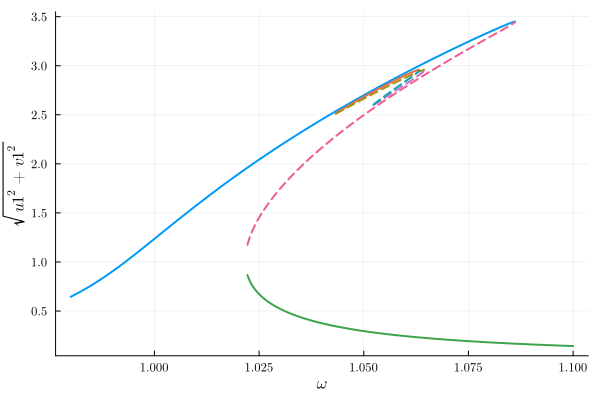

In [5]:
plot(result, x="ω", y="sqrt(u1^2 + v1^2)", class="stable", legend=false)
plot!(result, x="ω", y="sqrt(u1^2 + v1^2)", not_class="stable", style=:dash)